In [2]:
# импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# подключение к данным
raw_data = pd.read_csv('data/cars.csv')

# переопределим названия полей
cars = raw_data.rename(columns = {
    'Car ID' : 'car_id',
    'Brand' : 'brand',
    'Year' : 'year',
    'Engine Size' : 'eng_size',
    'Fuel Type' : 'fuel_type',
    'Transmission' : 'trans',
    'Mileage' : 'mil',
    'Condition' : 'condition',
    'Price' : 'price',
    'Model' : 'model'
})

display(cars.sample(5))

,car_id,brand,year,eng_size,fuel_type,trans,mil,condition,price,model
1242,1243,Audi,2002,2.4,Diesel,Manual,273302,New,92834.17,A4
2093,2094,Mercedes,2021,1.2,Diesel,Automatic,267724,Like New,52767.60,E-Class
336,337,Ford,2002,4.7,Electric,Manual,214469,New,17672.68,Mustang
819,820,Audi,2016,4.2,Diesel,Manual,205384,New,16479.84,Q7
2113,2114,Tesla,2014,5.1,Diesel,Manual,180557,Used,59622.21,Model X


In [4]:
# Беглый взгляд на данные
cars.info()
round(cars.describe(include="number"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   car_id     2500 non-null   int64  
 1   brand      2500 non-null   object 
 2   year       2500 non-null   int64  
 3   eng_size   2500 non-null   float64
 4   fuel_type  2500 non-null   object 
 5   trans      2500 non-null   object 
 6   mil        2500 non-null   int64  
 7   condition  2500 non-null   object 
 8   price      2500 non-null   float64
 9   model      2500 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 195.4+ KB


,car_id,year,eng_size,mil,price
count,2500.0,2500.0,2500.0,2500.0,2500.0
mean,1250.0,2012.0,3.0,149750.0,52638.0
std,722.0,7.0,1.0,87920.0,27296.0
min,1.0,2000.0,1.0,15.0,5011.0
25%,626.0,2005.0,2.0,71832.0,28908.0
50%,1250.0,2012.0,3.0,149085.0,53485.0
75%,1875.0,2018.0,5.0,225990.0,75839.0
max,2500.0,2023.0,6.0,299967.0,99983.0


# Описательная статистика

## Среднее

Чтобы вычислить выборочное среднее, нужно сложить все значения и разделить на их количество. Воспользуемся библиотекой Pands для нахождения среднего значения по году без учета марки и прочих параметров. 

In [50]:
# Агрегируем, получая сумму и среднее
cars_group_year = cars.groupby(['year', 'condition']).agg({'price': ['sum', 'mean']})

# Округлим до 2 знаков после запятой и сбросим индекс
cars_group_year = cars_group_year.round(2).reset_index()

cars_group_year.columns = ['year', 'condition', 'price_sum', 'price_mean']

# Смотрим на данные 
display(cars_group_year[['year', 'condition', 'price_mean']])


,year,condition,price_mean
0,2000,Like New,47859.84
1,2000,New,52490.82
2,2000,Used,60174.49
3,2001,Like New,52783.80
4,2001,New,51700.49
...,...,...,...
67,2022,New,52606.20
68,2022,Used,59383.07
69,2023,Like New,52179.13
70,2023,New,46019.62


Построим простую визуализацию для отображения данных 

Для начала используем matplotlib

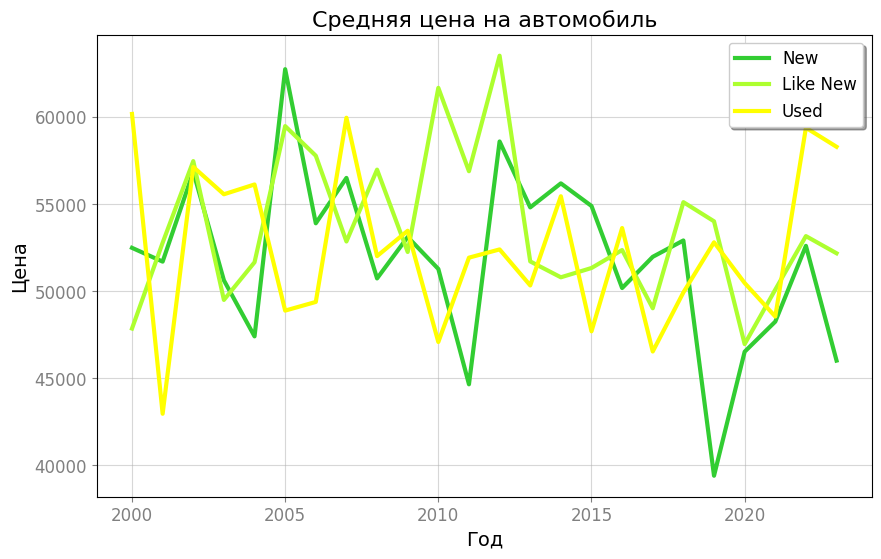

In [84]:
# Выбираем данные для оси X и оси Y
years = cars_group_year['year'] # Берём только уровень 'year' из MultiIndex
new = cars_group_year[cars_group_year['condition'] == 'New']
like_new = cars_group_year[cars_group_year['condition'] == 'Like New']
used = cars_group_year[cars_group_year['condition'] == 'Used']


# Построение графика
plt.figure(figsize=(10, 6))  # Размеры графика

# Добавляем линиb графика
plt.plot(new['year'], new['price_mean'], linestyle='-', linewidth=3, color='#32CD32', label='New')
plt.plot(like_new['year'], like_new['price_mean'], linestyle='-', linewidth=3, color='#ADFF2F', label='Like New')
plt.plot(used['year'], used['price_mean'], linestyle='-', linewidth=3, color='#FFFF00', label='Used')

# Настройка заголовков и подписей
plt.title('Средняя цена на автомобиль', fontsize=16)
plt.xlabel('Год', fontsize=14)
plt.ylabel('Цена', fontsize=14)

# Добавляем сетку
plt.grid(True, alpha=0.5)

# Настройка подписей осей
plt.tick_params(axis='both', labelsize=12, colors='gray')

# Добавляем легенду
plt.legend(loc='upper right', fontsize=12, frameon=True, shadow=True)

# Отображаем график
plt.show()


По аналогии построим график в seaborn

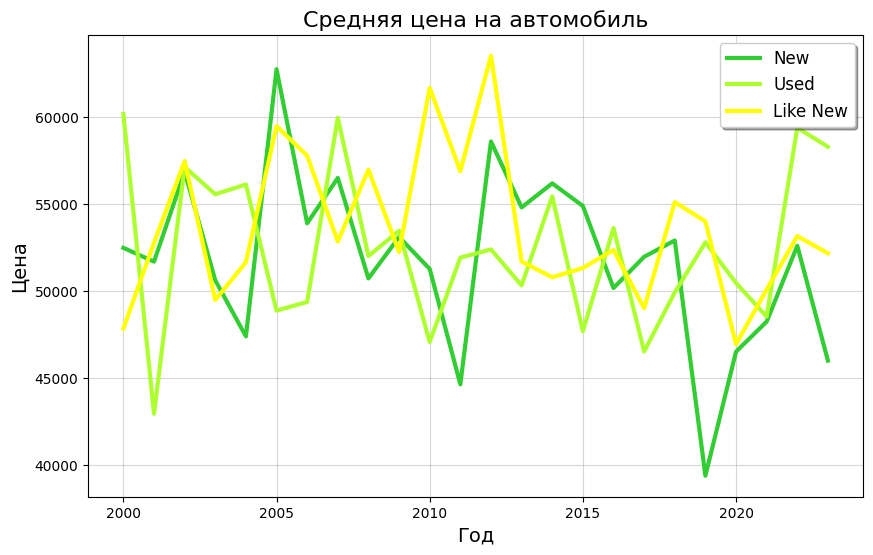

In [ ]:
plt.figure(figsize=(10, 6))

# Построение графика без закраски вдоль линий (ci=None)
sns.lineplot(
    x=cars['year'], 
    y=cars['price'], 
    hue=cars['condition'], 
    errorbar=None,
    palette = ['#32CD32', '#ADFF2F', '#FFFF00'], 
    linewidth=3)

plt.title('Средняя цена на автомобиль', fontsize=16)
plt.xlabel('Год', fontsize=14)
plt.ylabel('Цена', fontsize=14)

plt.grid(True, alpha=0.5)
plt.legend(loc='upper right', fontsize=12, frameon=True, shadow=True)

plt.show()